## Pro-origami - proitein wiring diagram generation without any installations
Based on [here](https://www.biostars.org/p/9552989/#9597554), which leads to [here](https://sites.google.com/site/alexdstivala/home/pro-origami) at present.

This Jupyter Notebook file is meant to make it easy to use it without needing to install anything. Use described [here](https://sites.google.com/site/alexdstivala/home/pro-origami) is a little convoluted for those not used to dealing with Unix/unix-like command line and this notebook aims to make it much easier. (If you didn't start by clicking the 'launch binder' badge [here](https://github.com/fomightez/pro-origami-binder), you should as this notebook assumes that.)

To get started feel free to select `Run` > `Run All Cells` and then read through as the steps run.  
Or alternatively, read each cell and run each code cell in turn by entering '`Shift`+`enter`'

#### Preparation

A lot of the preparation has already been handled by integration with the MyBinder service if you are running this as intended. The software was already retrieved and unpacked and the working directory already changed. 

If you aren't running this as intended, try running this code in a Jupyter Noetbook to do those steps:

```python
# get the software & unpack, if needed (doing this way maked it easier to re-run entire notebook if needed)
import os
file_signifying_installed_software = "./proorigami-cde-package/cde-root/home/proorigami/make_cartoon.sh"
if not os.path.isfile(file_signifying_installed_software):
    !curl -OL https://stivalaa.github.io/AcademicWebsite/software/proorigami-cde-package.tar.gz
    !tar zxf proorigami-cde-package.tar.gz
#change working directory to the directory where the software works
%cd proorigami-cde-package/cde-root/home/proorigami/
```

Getting your bearings...     
The next two cells should show the following:

For `pwd` result:

```shell
/home/jovyan/proorigami-cde-package/cde-root/home/proorigami
```

For `ls` result, which lists the files and diretories there:

```shell
1UBI.png  1UBI.svg  make_cartoon.sh*  make_cartoon.sh.cde*
```

In [1]:
pwd

'/home/jovyan/proorigami-cde-package/cde-root/home/proorigami'

In [2]:
ls

1UBI.png  make_cartoon.sh*      pdbs/                       zipped_pdbs/
1UBI.svg  make_cartoon.sh.cde*  pro-origami_demo_use.ipynb


The `ls` results is important because `make_cartoon.sh` is the script we'll run to generate the diagrams.  
Backing up to the `pwd` means the current working directory is where the script is located, and the [current instructions here](https://sites.google.com/site/alexdstivala/home/pro-origami) indicate that needs to tbe the case.

So the software to generate the topology wiring diagrams should be set.  
What about input data?

##### Preparation continued: Getting structure data to use as input

The software takes as input PDB files in the older style, not PDBx/mmCIF format, or even gzipped PDB files ,which are the older style PDB files in still compressed form. The code below will get several. 
Feel free to change one of them to the PDB id code of your favorite protein structure. I don't suggest changing all of them because this way you have a test in case something isn't correct. I know the process should work with what is provided.

In [3]:
# get your protein structure files
!curl -OL https://files.rcsb.org/download/1d66.pdb.gz
!mkdir -p zipped_pdbs
!mv 1d66.pdb.gz zipped_pdbs/
!curl -OL https://files.rcsb.org/download/8hiz.pdb.gz
!mv 8hiz.pdb.gz zipped_pdbs/
!curl -OL https://files.rcsb.org/download/1ubi.pdb.gz
!mv 1ubi.pdb.gz zipped_pdbs/
!curl -OL https://files.rcsb.org/download/1crn.pdb.gz
!gunzip 1crn.pdb.gz
!mkdir -p pdbs
!mv 1crn.pdb pdbs/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 41994  100 41994    0     0   8998      0  0:00:04  0:00:04 --:--:-- 10430
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 63571  100 63571    0     0  70709      0 --:--:-- --:--:-- --:--:-- 70713
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17743  100 17743    0     0  31418      0 --:--:-- --:--:-- --:--:-- 31403
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10699  100 10699    0     0  20450      0 --:--:-- --:--:-- --:--:-- 20417


Let's run the main example first.

In [4]:
!./make_cartoon.sh.cde zipped_pdbs/8hiz.pdb.gz

/bin/sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/bin/sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/bin/sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
 !!! Residue GLN   13 A has  1 instead of expected   5 sidechain atoms.
     Calculated solvent accessibility refers to incomplete sidechain !!!

 !!! Residue ASP   22 A has  1 instead of expected   4 sidechain atoms.
     Calculated solvent accessibility refers to incomplete sidechain !!!

 !!! Residue LYS  113 A has  1 instead of expected   5 sidechain atoms.
     Calculated solvent accessibility refers to incomplete sidechain !!!

 !!! Residue LYS  211 A has  1 instead of expected   5 sidechain atoms.
     Calculated solvent accessibility refers to incomplete sidechain !!!

 !!! Residue ARG  246 A has  1 instead of expected   7 sidechain atoms.
     Calculated solvent accessibility refers to incomplete sidechain !!!

 !!! Residue ARG  265 A has  1 instead of expected   7

Ignore any `Gtk-WARNING`-related notifications. You are using this in a Jupyter session on a remote machine if you ran this as intended, and the software cannot trigger opening the resulting file automatically for display as it would if installed on a desktop.    
Because Jupyter is super convenient though we can still examine the output result.  
To get started with that, let's see if we can see the result first by running the next cell?

In [5]:
ls

1UBI.png    8HIZ-1.svg  make_cartoon.sh*      pro-origami_demo_use.ipynb
1UBI.svg    8HIZ-2.png  make_cartoon.sh.cde*  zipped_pdbs/
8HIZ-1.png  8HIZ-2.svg  pdbs/


The protein observed in the structure with PDB id code `8hiz` contains two compact folded domains, seen in an independent wiring topology diagram [here](https://www.ebi.ac.uk/thornton-srv/databases/cgi-bin/pdbsum/GetPage.pl?pdbcode=8hiz&template=protein.html&r=wiring&l=1&chain=A) & summarized [here](https://www.chem.uwec.edu/webpapers2005/mintermm/pages/gdh.html#:~:text=group%2C%20or%20domain.-,GDH%20consist%20of%20two%20domains%2C%20which%20are%20separated%20by%20an,Domain%20I%20is%20colored%20blue.) and [here](https://proteopedia.org/wiki/index.php/Glutamate_dehydrogenase#Structural_highlights). Because there are two domains, Pro-origami produces two output files, one for each compact folded domain.

The output are in both bitmap, `.png` and vector-based, `.svg`, forms of the images for use in various ways.

You have options in the intended Jupyter session here to look into the output.  
You can simply double click on the files `8HIZ-1.png` and `8HIZ-2.png` listed in the file navigation panel on the left to view them.
Or run the next to code cells to view the images right in the notebook.

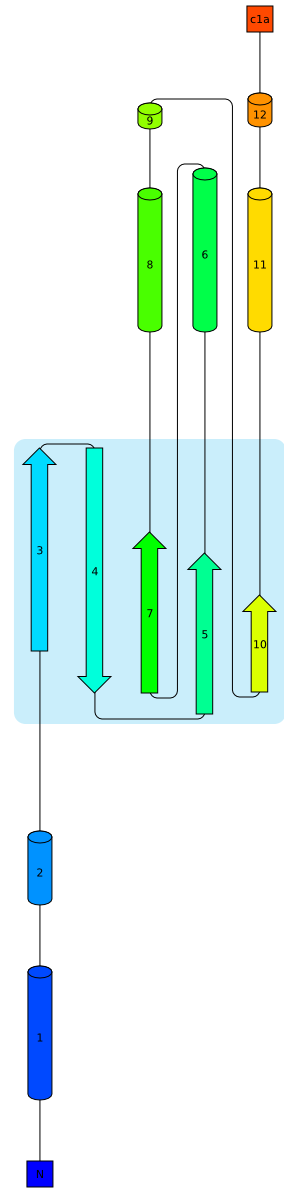

In [6]:
from IPython.display import Image
Image('8HIZ-1.png')

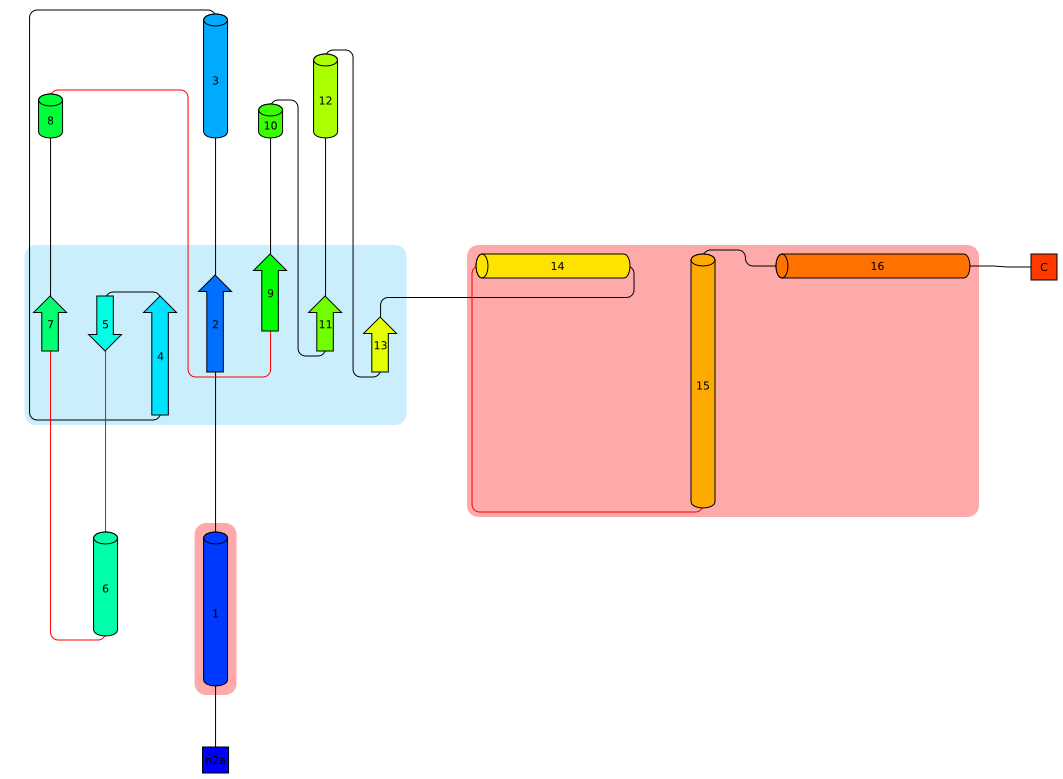

In [7]:
from IPython.display import Image
Image('8HIZ-2.png')

Viewing the images in the image viewer by clicking on the files will better reflect what they look like because they won't be constrained to fit in the Jupyter output area.

### Customizing

Currently, the line that can be customize in `make_cartoon.sh` is as follows:

```shell
PTGRAPH2_OPTIONS="-r35 -t dssp -k purple -l crossing:black,red,green,navy,blue -b sequential -j -e auto -f auto -o gradient -p ddomain"
```

Run the next cell to copy the script as `custom_make_cartoon.sh` with the following changes:

```shell
PTGRAPH2_OPTIONS="-u -r35 -t dssp -k purple -l crossing:teal,black,red,green,navy,blue -b sequential -j -e auto -f auto -o gradient -p ddomain"
```

That changes just two things for a demonstration of the customization possible. The `-u` flag is added so the the multidomain cartoon is placed in one file instead of two, and additional color, `teal` is added in to the `crossing` part of the `connector color scheme`.

In [8]:
!sed 's/-r35 -t dssp -k purple -l crossing:black/-u -r35 -t dssp -k purple -l crossing:teal,black/g' <make_cartoon.sh >custom_make_cartoon.sh

That's the main change necessary. The following code will make a custom copy of the wrapper & set permissions to use that script instead of the default one so we leave everyting else intact for later, typical use.

In [9]:
!chmod +x custom_make_cartoon.sh
!sed 's/make_cartoon.sh/custom_make_cartoon.sh/g' <make_cartoon.sh.cde >custom_make_cartoon.sh.cde
!chmod +x custom_make_cartoon.sh.cde

Now to run the customized script with the input:

In [10]:
!./custom_make_cartoon.sh.cde zipped_pdbs/8hiz.pdb.gz

/bin/sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/bin/sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/bin/sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
 !!! Residue GLN   13 A has  1 instead of expected   5 sidechain atoms.
     Calculated solvent accessibility refers to incomplete sidechain !!!

 !!! Residue ASP   22 A has  1 instead of expected   4 sidechain atoms.
     Calculated solvent accessibility refers to incomplete sidechain !!!

 !!! Residue LYS  113 A has  1 instead of expected   5 sidechain atoms.
     Calculated solvent accessibility refers to incomplete sidechain !!!

 !!! Residue LYS  211 A has  1 instead of expected   5 sidechain atoms.
     Calculated solvent accessibility refers to incomplete sidechain !!!

 !!! Residue ARG  246 A has  1 instead of expected   7 sidechain atoms.
     Calculated solvent accessibility refers to incomplete sidechain !!!

 !!! Residue ARG  265 A has  1 instead of expected   7

Check the result, compare to above:

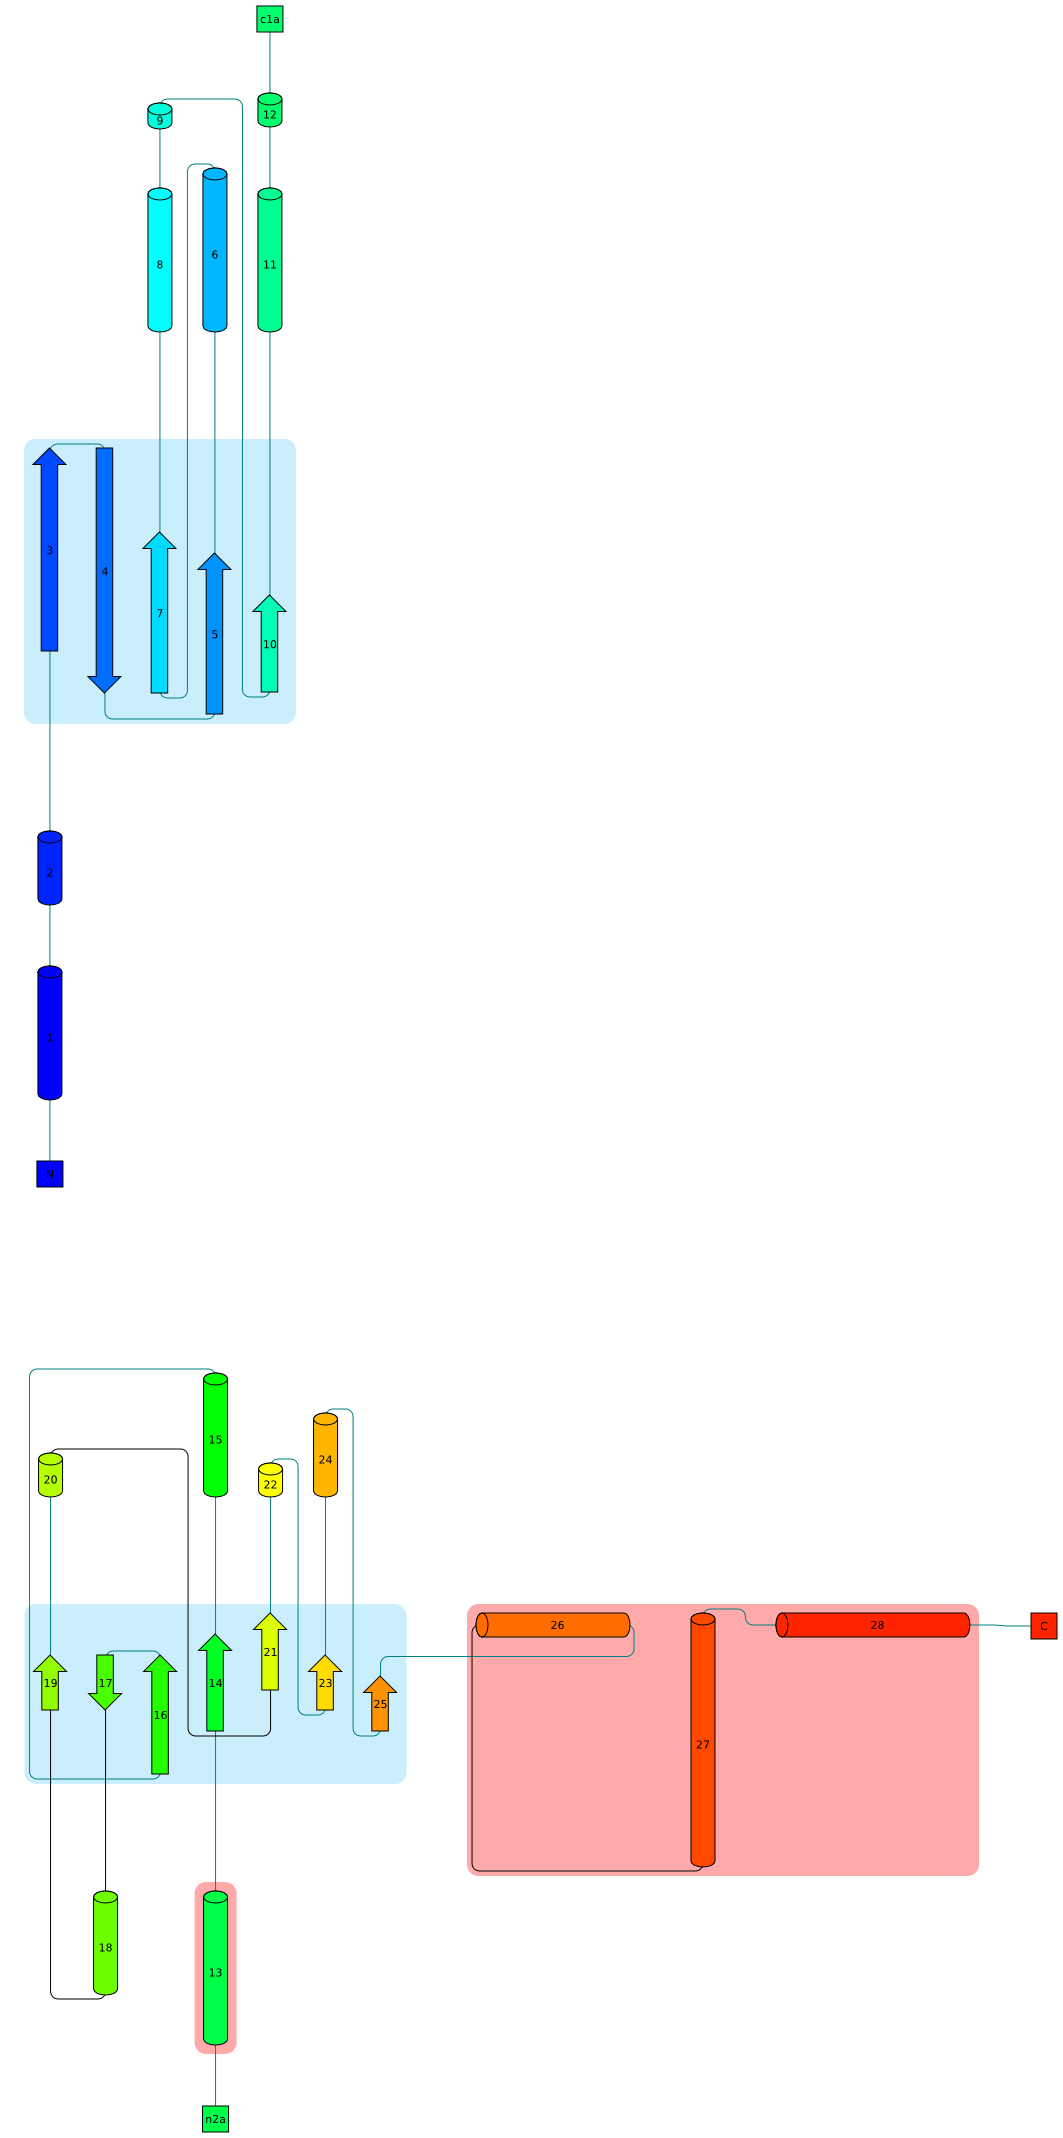

In [11]:
from IPython.display import Image
Image('8HIZ.png')

Keep in mind when viewing the above output that what is shown is just a view made to fit the window and doesn't necessarily reflect the resolution of the actual file. You'll want to click the image file in the file navigation pane to the left if you want to open it in a more versatile image viewer.

All the options can be seen by running `the ptgraph2.py` without any arguments, like so:

In [12]:
!~/proorigami-cde-package/cde-exec ~/proorigami-cde-package/cde-root/usr/local/proorigami-prod/ptgraph/ptgraph2.py 

Usage: /home/jovyan/proorigami-cde-package/cde-root/usr/local/proorigami-prod/ptgraph/ptgraph2.py [-35acdnhrmvixgqzuwy] [ -o sse_color_scheme] [ -l connector_color_scheme ]  [ -b sse_label_scheme ]  [ -k <color> ] [ -g <separation> ] [ -e <color_list>|auto ] [ -f <color_list>|auto ] [-p domain_prog] [-t struct_prog] PDBfile
  -3 include 3_10 helices in diagram
  -5 include pi helices in diagram
  -a use Dunnart automatic graph layout
  -c use HELIX and SHEET cards from PDB file
  -d use GraphViz dot instead of Dunnart SVG
  -n use GraphViz neato instead of Dunnart SVG
  -p domain_prog : use domain_prog to parse domains
       supported is 'none' or 'ddomain' (default)
       or 'cath:cdf_file_name'
  -h graph hydrogen bonds with GraphViz
  -b SSE labelling scheme: 'none', 'sequential', 'separate' (default)
  -t struct_prog : use struct_prog define secondary structure
       supported is 'stride' or 'dssp' (default)
  -r compute angles internally, not with external TableauCreator
  -m w

For example, it looks like the diagram at PDBsum shows the residue numbering at the start and end of the secondary structure element and so if you like that style, you'd want to add the `-q` flag into the code for the settings.

### Running all the rest of the examples

Let's move the examples of output supplied with the software to set up to run all the rest. (I made sure when getting started that data from PDB 1ubi is giving same result as the `1UBI.png` included in the software, and so we shouldn't need it around to check, but this leaves the possibility users can verify themselves.)

In [13]:
!mv 1UBI.png orig_1UBI.png
!mv 1UBI.svg orig_1UBI.svg

Let's run the rest!  
The code below will check if any PDB files are in the two directories `pdbs` or `zipped_pdbs` and process them **with the default settings** if they haven't already been processed in the course of running the code above.  
You may wish to get your favorite PDB file now before running this since it takes some time. You should place the file in one of the two directories, it doesn't really matter which one as any `.pdb` or `.pdb.gz` file will be processed by running the following code. Specifically, 8hiz get skipped since it was just run in the course of running cells above.

The following code will make a list of the files and iterate on that list to run `make_cartoon.sh.cde` using each as input, while skipping '8hiz'.

In [14]:
import os
the_pdb_directories = ['pdbs','zipped_pdbs']
for current_directory in the_pdb_directories:
    for filename in os.listdir(current_directory):
        if filename.lower().endswith(('.pdb', '.pdb.gz')) and filename != '8hiz.pdb.gz':
            !./make_cartoon.sh.cde {current_directory}/{filename}

/bin/sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/bin/sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
 !!! Residue ASN   46 A has  5 instead of expected   4 sidechain atoms.
     last sidechain atom name is  OXT
     calculated solvent accessibility includes extra atoms !!!

/bin/sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
overlap count for 1CRN.svg (default) is 0
going back to to default gapsize (overlap count 0) for 1CRN.svg
/bin/sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)

(process:634): Gtk-WARNING **: Locale not supported by C library.
	Using the fallback 'C' locale.
Background RRGGBBAA: ffffffff
Area 0:0:104:638 exported to 104 x 638 pixels (90 dpi)
Bitmap saved as: 1CRN.png
/bin/sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/bin/sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/bin/sh: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
/usr/l

Examine the images made any of the ways described above.

**If you make anything useful be sure to download it ASAP as this session is temporary.**  
You can right-click on files showing in the file browser to the left and select '`Download`' to download them to your local machine.

If you haven't retrieved your favorite protein structure file yet and processed it, please use the code above as a guide, or simply edit the code, and step through doing that now.

-----

Enjoy!